In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import acos, degrees
from scipy.signal import find_peaks

In [33]:
df = pd.read_csv('/Users/swas92/Desktop/nRIM/Ridge_walking/scripts/Trajectories.csv')

In [35]:
#pd.read_csv('Trajectories.csv')
#pd.columns = ['bodyparts', 'nose_x', 'nose_y', 'nose_lik', 'tail1_x', 'tail1_y', 'tail1_lik', 'tail2_x', 'tail2_y', 'tail2_lik', 'tail3_x', 'tail3_y', 'tail3_lik' ]
df.rename(columns={'DLC_resnet50_Ridge_walkFeb19shuffle1_100000.3':'tail1_x',
                          'DLC_resnet50_Ridge_walkFeb19shuffle1_100000.4':'tail1_y',
                          'DLC_resnet50_Ridge_walkFeb19shuffle1_100000.6':'tail2_x',
                          'DLC_resnet50_Ridge_walkFeb19shuffle1_100000.7':'tail2_y',
                          'DLC_resnet50_Ridge_walkFeb19shuffle1_100000.9':'tail3_x',
                          'DLC_resnet50_Ridge_walkFeb19shuffle1_100000.10':'tail3_y'}, 
                 inplace=True)

In [ ]:
#list(df.columns.values) 

In [ ]:
#df[['tail1_x', 'tail1_y']]

In [36]:
#delete first two rows
df.iloc[0:2] = np.nan

<function matplotlib.pyplot.show(*args, **kw)>

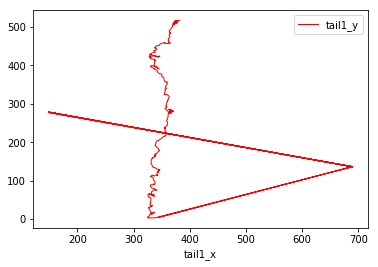

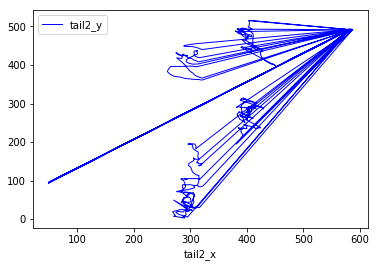

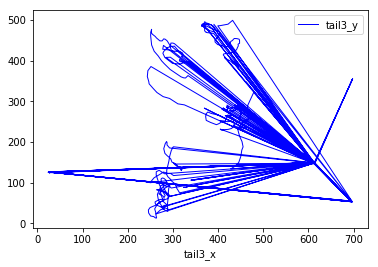

In [37]:
#take just numeric values
df.tail1_x=pd.to_numeric(df.tail1_x[2:])
df.tail1_y=pd.to_numeric(df.tail1_y[2:])
df.tail2_x=pd.to_numeric(df.tail2_x[2:])
df.tail2_y=pd.to_numeric(df.tail2_y[2:])
df.tail3_x=pd.to_numeric(df.tail3_x[2:])
df.tail3_y=pd.to_numeric(df.tail3_y[2:])
#plot tail vs y
df.plot(x='tail1_x',y='tail1_y',color='red', linewidth=1)
df.plot(x='tail2_x',y='tail2_y',color='blue', linewidth=1)
df.plot(x='tail3_x',y='tail3_y',color='blue', linewidth=1)
plt.show

In [ ]:
#Replace in tail2 values greater than with nan
#df[df.tail2_x>350] = np.nan
#df[df.tail2_y>200] = np.nan

In [ ]:
#df.plot(x='tail2_x',y='tail2_y',color='blue', linewidth=1)

In [20]:
#Compute angles from 3 points
def FindAngle3Points (a,b,c):
#a = np.array([6,0])
#b = np.array([0,0]) this is the vertex of the angle
#c = np.array([0,6])

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    print(np.degrees(angle))

In [ ]:
#a = MakePointFromCoord(df.tail1_x, df.tail1_y)
#b = MakePointFromCoord(df.tail2_x, df.tail2_y)
#c = MakePointFromCoord(df.tail3_x, df.tail3_y)

#MakePointFromCoord(df.tail1_x, df.tail1_y, df.tail2_x, df.tail2_y, df.tail3_x, df.tail3_y)

In [ ]:
  
# Create Pandas DataFrame 
#import pandas as pd 
  
# Initialise data to lists. 
#data = [{'x1': 1, 'y1': 2, 'x2':3, 'y2': 1, 'x3': 2, 'y3':3}, {'x1': 5, 'y1': 7, 'x2':3, 'y2': 8, 'x3': 2, 'y3':3}, {'x1': 1, 'y1': 7, 'x2':5, 'y2': 8, 'x3': 4, 'y3':3}] 
  
# Creates DataFrame. 
#df = pd.DataFrame(data) 
  
# Print the data 
#df 


In [43]:
#Cmpute angles using 3 poins coordinates (6 values for 2D trajectories), and append as last column of panda dataframe
angles=[]
for i in range(df.shape[0]):
    #x1,y1=df.tail1_x[i],df.tail1_y[i]
    x1,y1=df.tail2_x[i],0
    x2,y2=df.tail2_x[i],df.tail2_y[i]
    x3,y3=df.tail3_x[i],df.tail3_y[i]
    a=((x3-x1)**2+(y3-y1)**2)**0.5
    b=((x1-x2)**2+(y1-y2)**2)**0.5
    c=((x2-x3)**2+(y2-y3)**2)**0.5

    angle=degrees(acos((b*b+c*c-a*a)/(2.0*b*c)))
    angles.append(round(angle,2))

df['Angles']=angles
df.head()

,scorer,DLC_resnet50_Ridge_walkFeb19shuffle1_100000,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.1,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.2,tail1_x,tail1_y,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.5,tail2_x,tail2_y,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.8,tail3_x,tail3_y,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.11,Angles
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,675.5014648,195.6283722,0.81424129,688.687378,136.857574,0.999085426,581.483826,491.771393,0.999676228,612.387573,149.442520,0.999997139,5.16
3,1.0,675.4313354,195.7510834,0.79713279,688.733154,136.867233,0.999137282,581.648804,491.686188,0.999774456,612.258240,148.024582,0.999998331,5.09
4,2.0,675.4213867,195.5429535,0.830952823,688.551697,136.645172,0.999296904,581.348572,491.853455,0.999688506,612.459534,148.150040,0.999997854,5.17


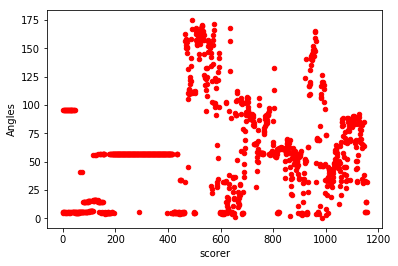

In [44]:
# Change scorer column to numeric value
df.scorer = pd.to_numeric(df.scorer[2:])
#ser1 = pd.Series(np.linspace(1, len(df), len(df)))
#Plot tail angles against Frames Number 
df.plot(kind='scatter',x='scorer',y='Angles',color='red')
plt.show()

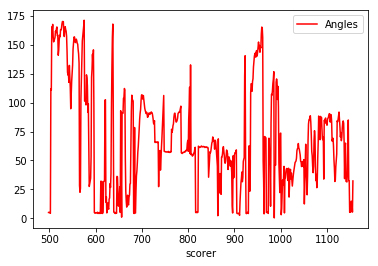

In [45]:
#Plot line and select range of rows (500:)
df.iloc[500:].plot.line(x='scorer',y='Angles',color='red')
plt.show()

1158

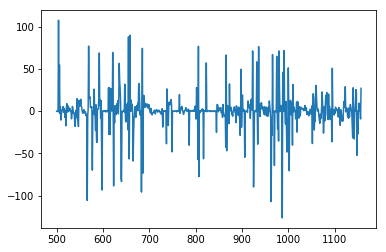

In [55]:
#Compute tail angle derivative and plot
Angle_der = np.diff(df.Angles)
Angle_der[0:500] = np.nan
plt.plot(Angle_der)
len(Angle_der)

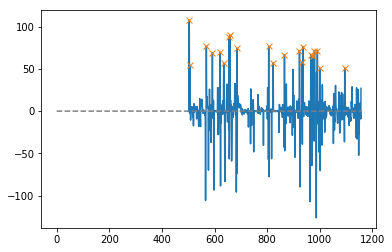

In [58]:
#Find peaks for tail angle derivative (which tells me Events where tail flicks on other side)
x = Angle_der
peaks, _ = find_peaks(x, height=50)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [40]:
#Let's try with known angles if that makes things easier.....
#data = [{'x1': 5, 'y1': 0, 'x2':5, 'y2': 5, 'x3': 10, 'y3':5}, 
#        {'x1': 5, 'y1': 0, 'x2':5, 'y2': 5, 'x3': 10, 'y3':5}]


In [71]:
#Create a list comprehension by chunking x (tail angle derivatives) in 'chunk_width' frames 
#based on peak detection of X
chunk_width = 20
list_df = [x[i-chunk_width:i+chunk_width] for i in peaks]

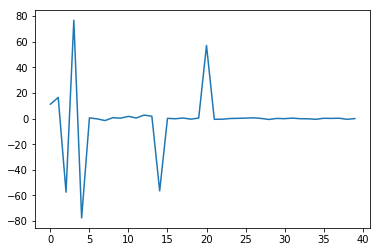

In [72]:
plt.plot(list_df[10])

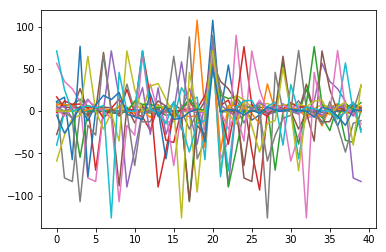

In [91]:
#Plot all traces of chunks centered around peak
for i in np.arange(len(peaks)):
    plt.plot(list_df[i])